In [1]:
import ROOT

Welcome to JupyROOT 6.24/06


In [2]:
f = ROOT.TFile.Open("Data_8TeV.root") 

In [3]:
canvas = ROOT.TCanvas("Canvas","a first way to plot a variable",800,600)

In [4]:
tree = f.Get("mini")

In [5]:
tree.Print()
tree.GetEntries()

14945674

******************************************************************************
*Tree    :mini      : 4-vectors + variables required for scaling factors     *
*Entries : 14945674 : Total =      3737586466 bytes  File  Size = 1366006484 *
*        :          : Tree compression factor =   2.74                       *
******************************************************************************
*Br    0 :runNumber : runNumber/I                                            *
*Entries : 14945674 : Total  Size=   59789737 bytes  File Size  =     297928 *
*Baskets :       70 : Basket Size=    1224192 bytes  Compression= 200.68     *
*............................................................................*
*Br    1 :eventNumber : eventNumber/I                                        *
*Entries : 14945674 : Total  Size=   59789885 bytes  File Size  =   44412272 *
*Baskets :       70 : Basket Size=    1224192 bytes  Compression=   1.35     *
*...................................................

In [6]:
hist_lep_pt = ROOT.TH1F("Lepton_pT","Lepton pT distribution; pT (MeV) ; Events ",1000,24000,70000)
hist_lep_n = ROOT.TH1F("Lepton_n","Number of Leptons distribution; N ; Events ",500,0,250)
hist_lep_TrckIsol = ROOT.TH1F("Lepton_TrckIsol","Lepton Track Isolation distribution; lep_ptcone30/lep_pt ; Events ",100,-1,1)
hist_lep_ClrmtrIsol = ROOT.TH1F("Lepton_ClrmtrIsol","Lepton Calorimeter Isolation distribution; lep_etcone20/lep_pt; Events ",100,-1,1)
hist_lep_eta = ROOT.TH1F("Lepton_eta_","Lepton \eta distribution; \eta (Grad) ; Events ",100,-3,3)
##############################
hist_njets = ROOT.TH1F("Number of jets","n-jets; Jet multiplicity; Events",12,-0.5,5)
hist_jet_pt = ROOT.TH1F("Jet_pT","Jet pT distribution; pT (MeV) ; Events ",1000,10000,150000)
hist_jet_eta = ROOT.TH1F("Jet_eta","Jet \eta distribution; \eta ; Events ",100,-3,3)
hist_jet_jvf = ROOT.TH1F("Jet_jvf","Jet JVF distribution; JVF ; Events ",100,-1,2)
hist_jet_MV1 = ROOT.TH1F("Jet_MV1","Jet MV1 distribution; MV1 ; Events ",100,-1,2)
hist_nbjets = ROOT.TH1F("n_bJets","Number of b-Jets distribution; N ; Events ",100,0.5,4.5)
hist_MET = ROOT.TH1F("MET","MET distribution; MET (MeV) ; Events ",1000,0,130000)
hist_mT_W = ROOT.TH1F("mT_W","Transverse mass W-boson distribution; mT_W (MeV) ; Events ",1000,10000,130000)

In [7]:
for event in tree:
    Lepton = ROOT.TLorentzVector()
    MeT = ROOT.TLorentzVector()
    MeT.SetPtEtaPhiM(tree.met_et,0.0,tree.met_phi,tree.met_et)
    for tr in range(tree.lep_n):
        hist_lep_pt.Fill(tree.lep_pt[tr])
        hist_lep_TrckIsol.Fill(tree.lep_ptcone30[tr]/tree.lep_pt[tr])
        hist_lep_ClrmtrIsol.Fill(tree.lep_etcone20[tr]/tree.lep_pt[tr])
        hist_lep_eta.Fill(tree.lep_eta[tr])
        Lepton.SetPtEtaPhiM(tree.lep_pt[tr],tree.lep_eta[tr],tree.lep_phi[tr],tree.lep_E[tr])
        mT_W = ROOT.sqrt(2*Lepton.Pt()*MeT.Et()*(1-ROOT.cos(Lepton.DeltaPhi(MeT))))
        hist_mT_W.Fill(mT_W)

    hist_njets.Fill(tree.jet_n)
    
    nbjets = 0
    for tr in range(tree.jet_n):
        hist_jet_pt.Fill(tree.jet_pt[tr])
        hist_jet_eta.Fill(tree.jet_eta[tr])
        hist_jet_jvf.Fill(tree.jet_jvf[tr])
        hist_jet_MV1.Fill(tree.jet_MV1[tr])
        if (tree.jet_MV1[tr] >= 0.7892):
            nbjets +=1
    hist_nbjets.Fill(nbjets)
    
    hist_MET.Fill(tree.met_et)

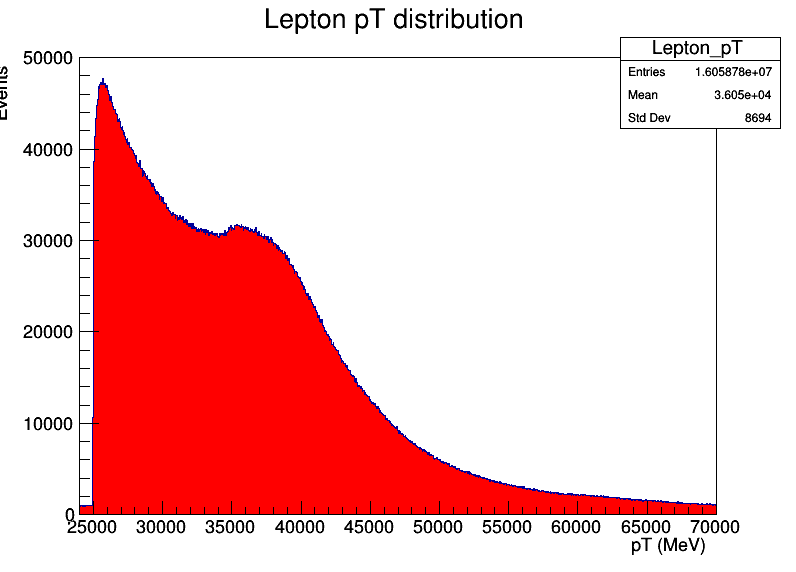

In [8]:
hist_lep_pt.SetFillColor(2)
hist_lep_pt.Draw("")
canvas.Draw()

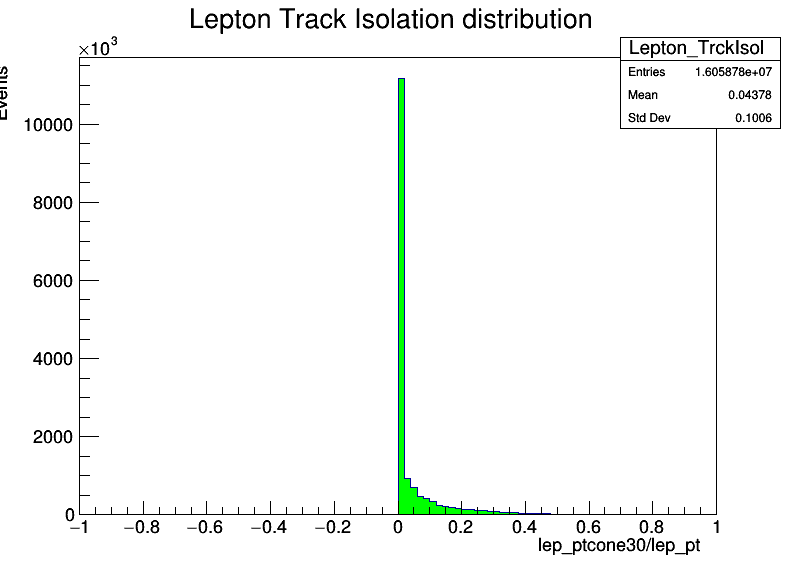

In [9]:
hist_lep_TrckIsol.SetFillColor(3)
hist_lep_TrckIsol.Draw("")
canvas.Draw()

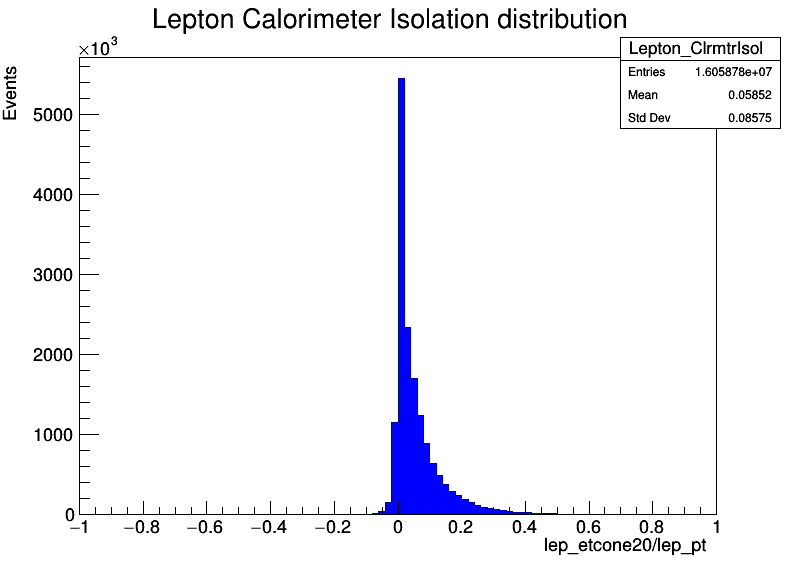

In [10]:
hist_lep_ClrmtrIsol.SetFillColor(4)
hist_lep_ClrmtrIsol.Draw("")
canvas.Draw()

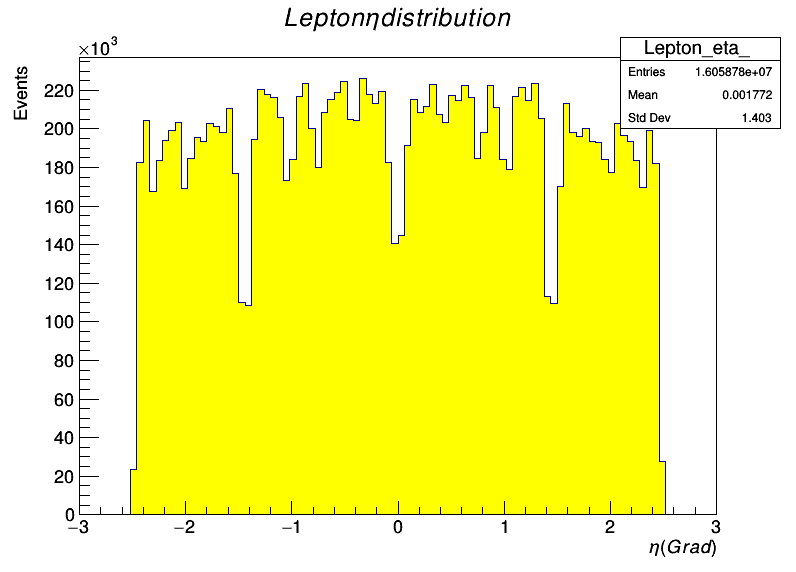

In [11]:
hist_lep_eta.SetFillColor(5)
hist_lep_eta.Draw("")
canvas.Draw()

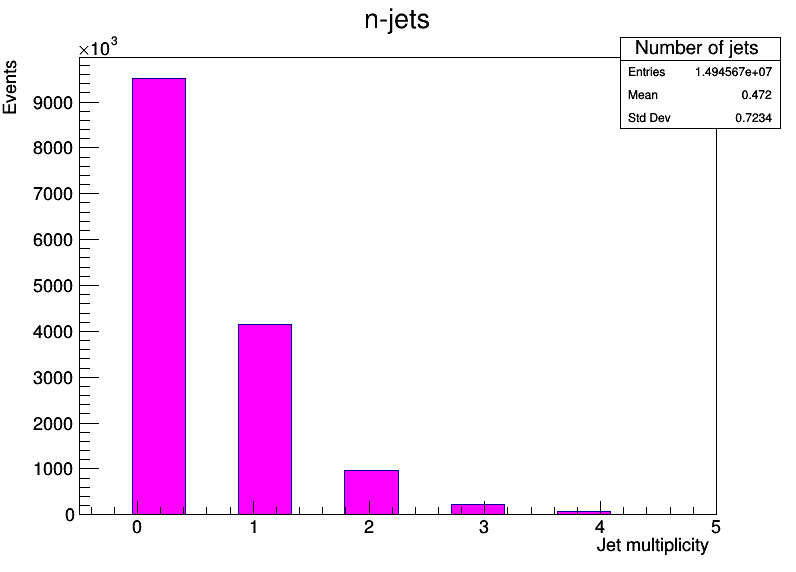

In [12]:
hist_njets.SetFillColor(6)
hist_njets.Draw("")
canvas.Draw()

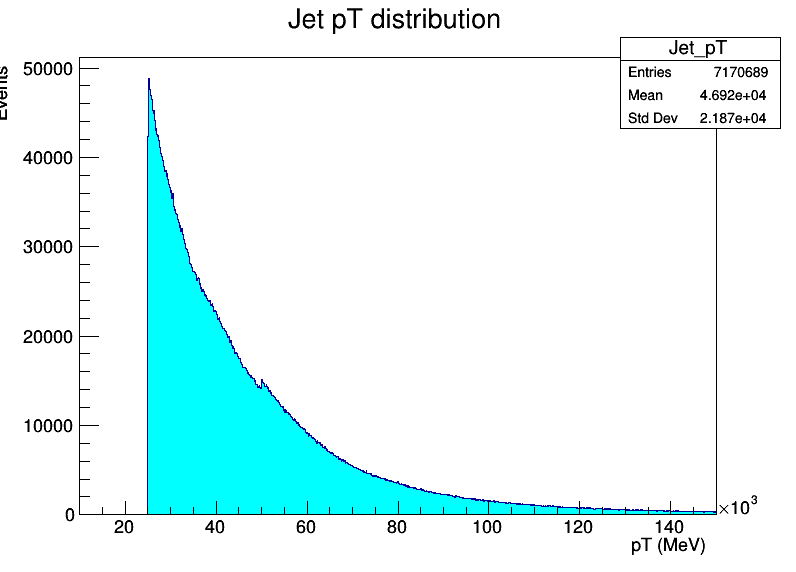

In [13]:
hist_jet_pt.SetFillColor(7)
hist_jet_pt.Draw("")
canvas.Draw()

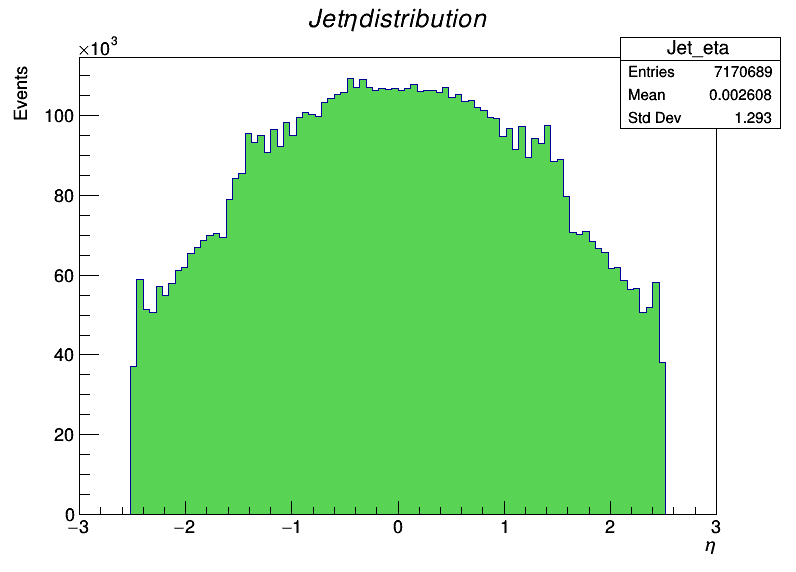

In [14]:
hist_jet_eta.SetFillColor(8)
hist_jet_eta.Draw("")
canvas.Draw()

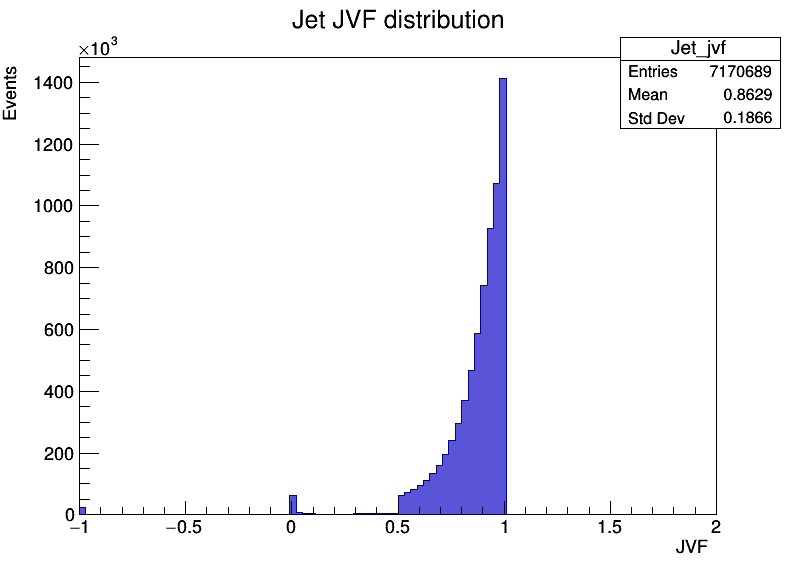

In [15]:
hist_jet_jvf.SetFillColor(9)
hist_jet_jvf.Draw("")
canvas.Draw()

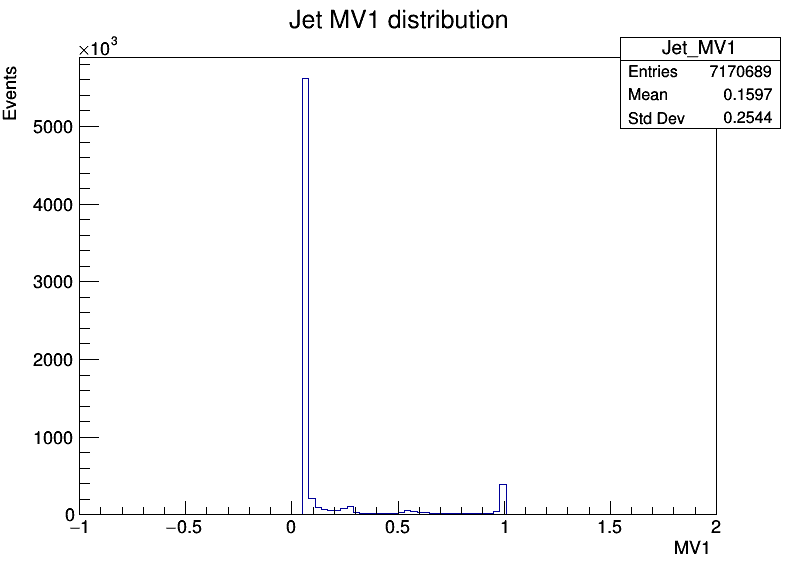

In [16]:
hist_jet_MV1.SetFillColor(10)
hist_jet_MV1.Draw("")
canvas.Draw()

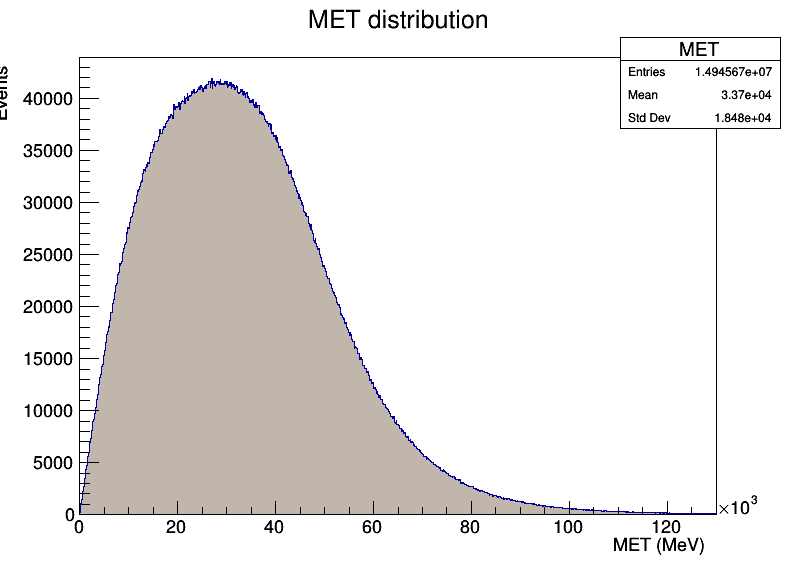

In [17]:
hist_MET.SetFillColor(11)
hist_MET.Draw("")
canvas.Draw()

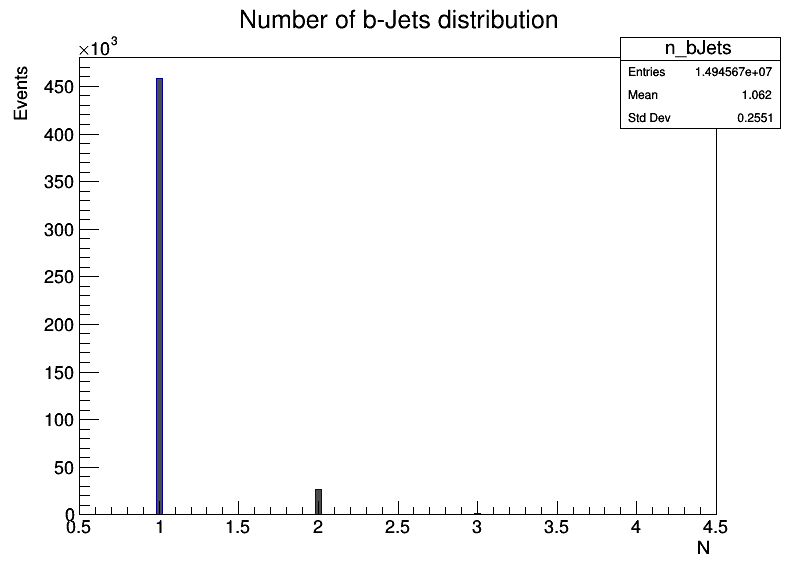

In [18]:
hist_nbjets.SetFillColor(12)
hist_nbjets.Draw("")
canvas.Draw()

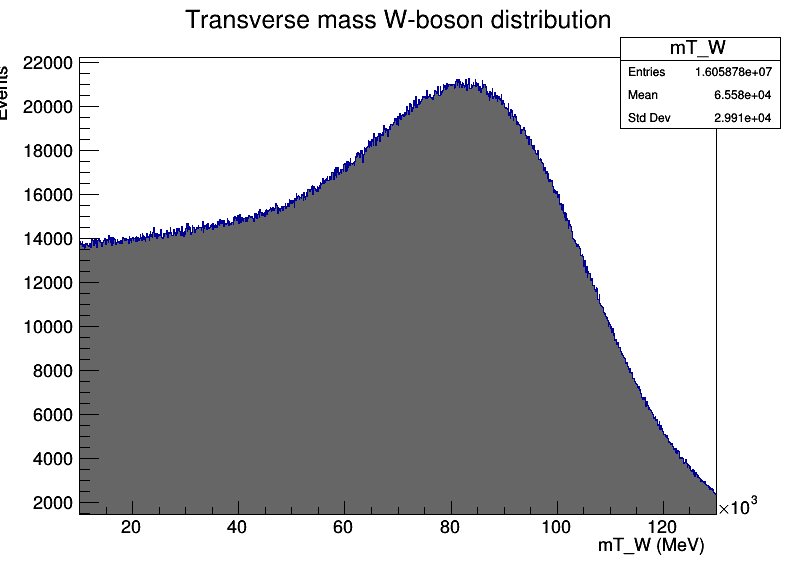

In [19]:
hist_mT_W.SetFillColor(13)
hist_mT_W.Draw("")
canvas.Draw()

In [20]:
Canvas_Grphx = ROOT.TCanvas("Canvas_Grphx","Canvas_Grphx",1600,1200)

In [21]:
Canvas_Grphx.Divide(3,4)

In [22]:
Canvas_Grphx.cd(1)
hist_lep_pt.SetFillColor(30)
hist_lep_pt.Draw("")

In [23]:
Canvas_Grphx.cd(2)
hist_lep_TrckIsol.SetFillColor(31)
hist_lep_TrckIsol.Draw("")

In [24]:
Canvas_Grphx.cd(3)
hist_lep_ClrmtrIsol.SetFillColor(32)
hist_lep_ClrmtrIsol.Draw("")

In [25]:
Canvas_Grphx.cd(4)
hist_lep_eta.SetFillColor(33)
hist_lep_eta.Draw("")

In [26]:
Canvas_Grphx.cd(5)
hist_njets.SetFillColor(34)
hist_njets.Draw("")

In [27]:
Canvas_Grphx.cd(6)
hist_jet_pt.SetFillColor(35)
hist_jet_pt.Draw("")

In [28]:
Canvas_Grphx.cd(7)
hist_jet_eta.SetFillColor(36)
hist_jet_eta.Draw("")

In [29]:
Canvas_Grphx.cd(8)
hist_jet_jvf.SetFillColor(37)
hist_jet_jvf.Draw("")

In [30]:
Canvas_Grphx.cd(9)
hist_jet_MV1.SetFillColor(38)
hist_jet_MV1.Draw("")

In [31]:
Canvas_Grphx.cd(10)
hist_MET.SetFillColor(39)
hist_MET.Draw("")

In [32]:
Canvas_Grphx.cd(11)
hist_nbjets.SetFillColor(40)
hist_nbjets.Draw("")

In [33]:
Canvas_Grphx.cd(12)
hist_mT_W.SetFillColor(41)
hist_mT_W.Draw("")

In [34]:
Canvas_Grphx.Print("Graphix.pdf")

Info in <TCanvas::Print>: pdf file Graphix.pdf has been created


In [35]:
cutflow_cut8 = ROOT.TH1F("Cutflow with Eighth Cut","Cutflow; Cut; Events",10,0,10)

In [36]:
cut1 = 0
cut2 = 0
cut3 = 0
cut4 = 0
cut5 = 0
cut6 = 0
cut7 = 0
cut8 = 0


for event in tree:
    #First cut: Good Vertex
    if (tree.hasGoodVertex):
        cut1 +=1
        cutflow_cut8.Fill(1)
        #Second cut: Trigger
        if (tree.trigE or tree.trigM):
            cut2 +=1
            cutflow_cut8.Fill(2)
            #Preselection of good leptons
            n_mu = 0
            n_el = 0
            n_lep = 0
            #Loop over leptons
            for tr in range(tree.lep_n):
                if tree.lep_pt[tr]>25000.:
                    if (tree.lep_ptcone30[tr]/tree.lep_pt[tr])<0.15:
                        if (tree.lep_etcone20[tr]/tree.lep_pt[tr])<0.15:
                            if (tree.lep_type[tr]==13 and ROOT.fabs(tree.lep_eta[tr])<2.5):
                                n_mu +=1
                                n_lep += 1
                            elif (tree.lep_type[tr]==11 and (ROOT.fabs(tree.lep_eta[tr])<1.37)):
                                n_el +=1
                                n_lep += 1
                            elif (tree.lep_type[tr]==11 and ((ROOT.fabs(tree.lep_eta[tr])>1.52) and (ROOT.fabs(tree.lep_eta[tr])<2.47))):
                                n_el +=1
                                n_lep += 1
                                #n_lep = n_mu + n_el
                            if (n_lep==1):
                                goodLptnIndx = tr
                                #Lepton.SetPtEtaPhiM(tree.lep_pt[tr],tree.lep_eta[tr],tree.lep_phi[tr],tree.lep_E[tr])
            #Select events with only 1 good lepton and fill the cutflow hidtogram
            #Third cut (one good lepton):
            if(n_lep==1):
                cutflow_cut8.Fill(3)
                cut3 +=1
                n_jets = 0
                n_bjets = 0
                #Number of jets distribution
                hist_njets.Fill(tree.jet_n)
                #Fourth cut: At least 4 jets
                if(tree.jet_n >= 4):
                    cutflow_cut8.Fill(4)
                    cut4 +=1
                    for tr in range(tree.jet_n):
                        if (tree.jet_pt[tr] > 25000.) and (ROOT.fabs(tree.jet_eta[tr]) < 2.5):
                            n_jets +=1
                        if (tree.jet_pt[tr]<50000) and (ROOT.fabs(tree.jet_eta[tr])<2.4):
                            if(tree.jet_jvf[tr]>0.5):
                                n_jets +=1
                        if((tree.jet_MV1[tr]) >= 0.7892):
                            n_bjets +=1
                #Fifth cut: At least 4 good jets
                if (n_jets > 4):
                    cutflow_cut8.Fill(5)
                    cut5 +=1
                    #Sixth cut: at least one b-jet
                    if (n_bjets >= 2):
                        cutflow_cut8.Fill(6)
                        cut6 +=1
                            
                        Lepton = ROOT.TLorentzVector()
                        MeT = ROOT.TLorentzVector()
                        Lepton.SetPtEtaPhiM(tree.lep_pt[goodLptnIndx],tree.lep_eta[goodLptnIndx],tree.lep_phi[goodLptnIndx],tree.lep_E[goodLptnIndx])
                        MeT.SetPtEtaPhiM(tree.met_et,0.0,tree.met_phi,tree.met_et)
                        mTW = ROOT.sqrt(2*Lepton.Pt()*MeT.Et()*(1-ROOT.cos(Lepton.DeltaPhi(MeT))))
                        #Seventh cut: MET > 30 GeV
                        if (tree.met_et > 30000.):
                            cutflow_cut8.Fill(7)
                            cut7 +=1
                            #Eighth cut: Calculation of the mTW using TLorentz vectors
                            if (mTW > 30000.):
                                cutflow_cut8.Fill(8)
                                cut8 +=1


            

print("Cut 1:", cut1)
print("Cut 2:", cut2)
print("Cut 3:", cut3)
print("Cut 4:", cut4)
print("Cut 5:", cut5)
print("Cut 6:", cut6)
print("Cut 7:", cut7)
print("Cut 8:", cut8)

Cut 1: 14656440
Cut 2: 14656440
Cut 3: 11533697
Cut 4: 61833
Cut 5: 58699
Cut 6: 10103
Cut 7: 7994
Cut 8: 6940


In [39]:
canvas_cuts = ROOT.TCanvas("Canvas_Cuts","a first way to plot a variable",800,600)

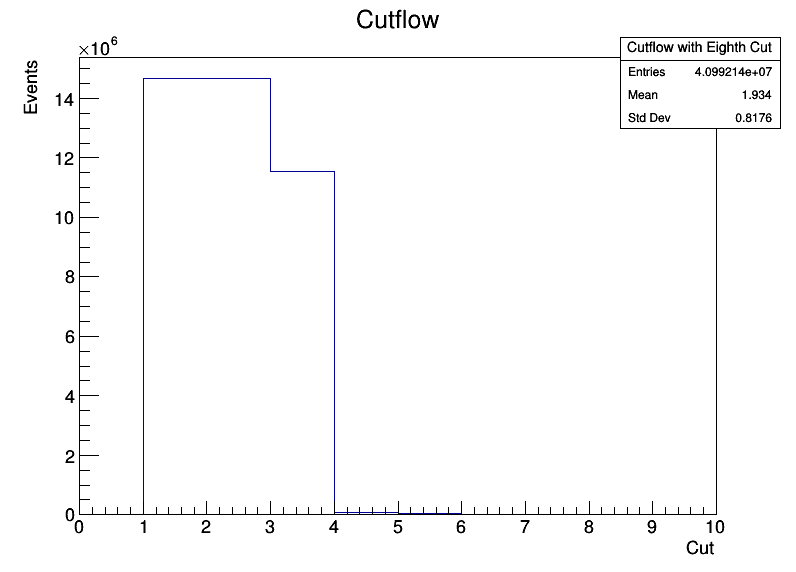

In [40]:
cutflow_cut8.Draw("")
canvas_cuts.Draw()

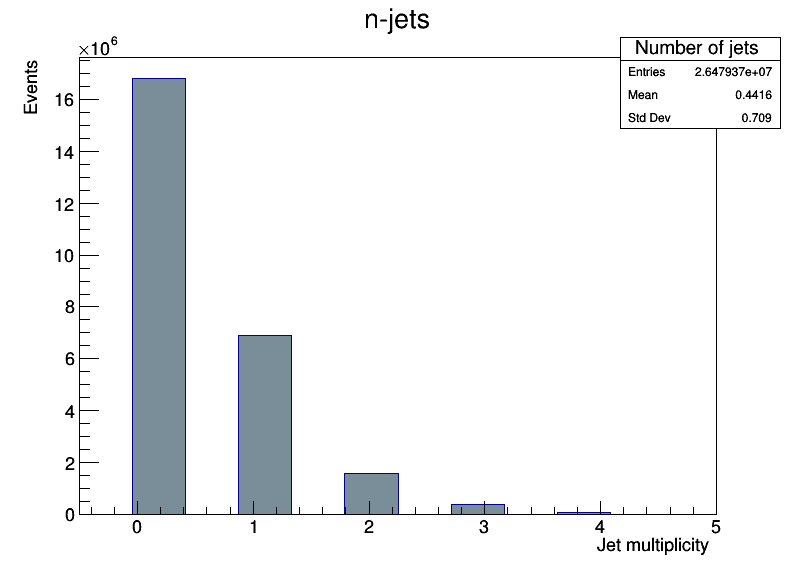

In [41]:
hist_njets.Draw("")
canvas_cuts.Draw()